In [1]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from utils.plot import getAccuracyPlot, getLossPlot

### Cifar 10

In [2]:
cifar10 = tf.keras.datasets.cifar10 #load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 10) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 10

In [6]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(output_size, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [5]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [6]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), 
                    validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),epochs=100)

Epoch 1/100
625/625 [==============================] - 24s 34ms/step - loss: 2.0631 - accuracy: 0.2146 - val_loss: 1.7571 - val_accuracy: 0.3552
Epoch 2/100
625/625 [==============================] - 21s 33ms/step - loss: 1.7048 - accuracy: 0.3705 - val_loss: 1.5994 - val_accuracy: 0.4202
Epoch 3/100
625/625 [==============================] - 21s 33ms/step - loss: 1.5505 - accuracy: 0.4323 - val_loss: 1.4743 - val_accuracy: 0.4736
Epoch 4/100
625/625 [==============================] - 21s 33ms/step - loss: 1.4374 - accuracy: 0.4802 - val_loss: 1.4030 - val_accuracy: 0.5022
Epoch 5/100
625/625 [==============================] - 20s 33ms/step - loss: 1.3665 - accuracy: 0.5032 - val_loss: 1.3272 - val_accuracy: 0.5178
Epoch 6/100
625/625 [==============================] - 20s 33ms/step - loss: 1.3017 - accuracy: 0.5295 - val_loss: 1.2897 - val_accuracy: 0.5357
Epoch 7/100
625/625 [==============================] - 20s 33ms/step - loss: 1.2646 - accuracy: 0.5446 - val_loss: 1.2332 - val_ac

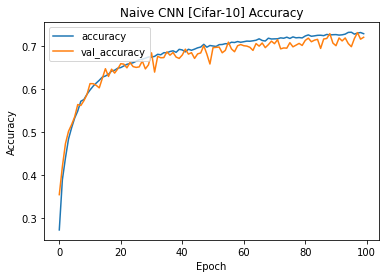

In [7]:
getAccuracyPlot(history, 'Naive CNN [Cifar-10]')

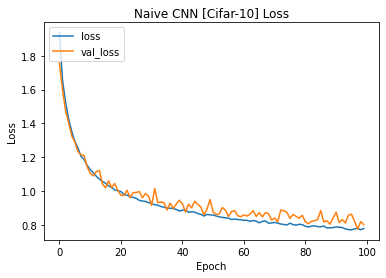

In [8]:
getLossPlot(history, 'Naive CNN [Cifar-10]')

In [9]:
model.save('cifar10_naivecnn_epoch100.h5')

In [4]:
from tensorflow.keras.models import load_model
model = load_model('cifar10_naivecnn_epoch100.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 3ms/step - loss: 0.6777 - accuracy: 0.7700


[0.6776972413063049, 0.7699999809265137]

### Cifar 100

In [2]:
cifar100 = tf.keras.datasets.cifar100 #load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 100) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 100) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 100

In [9]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])


In [10]:

history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), 
                    validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),epochs=100)

Epoch 1/100
625/625 [==============================] - 24s 33ms/step - loss: 4.4546 - accuracy: 0.0231 - val_loss: 4.0379 - val_accuracy: 0.0740
Epoch 2/100
625/625 [==============================] - 21s 33ms/step - loss: 3.9505 - accuracy: 0.0832 - val_loss: 3.8712 - val_accuracy: 0.0943
Epoch 3/100
625/625 [==============================] - 21s 33ms/step - loss: 3.7506 - accuracy: 0.1142 - val_loss: 3.7203 - val_accuracy: 0.1144
Epoch 4/100
625/625 [==============================] - 20s 33ms/step - loss: 3.6083 - accuracy: 0.1365 - val_loss: 3.5892 - val_accuracy: 0.1444
Epoch 5/100
625/625 [==============================] - 21s 33ms/step - loss: 3.4888 - accuracy: 0.1599 - val_loss: 3.4904 - val_accuracy: 0.1605
Epoch 6/100
625/625 [==============================] - 21s 33ms/step - loss: 3.4098 - accuracy: 0.1769 - val_loss: 3.4296 - val_accuracy: 0.1735
Epoch 7/100
625/625 [==============================] - 20s 33ms/step - loss: 3.3435 - accuracy: 0.1880 - val_loss: 3.3848 - val_ac

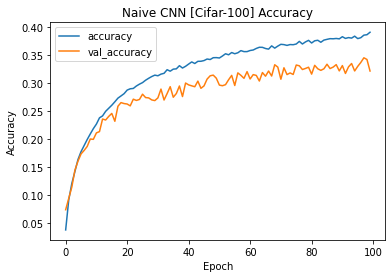

In [11]:
getAccuracyPlot(history, 'Naive CNN [Cifar-100]')

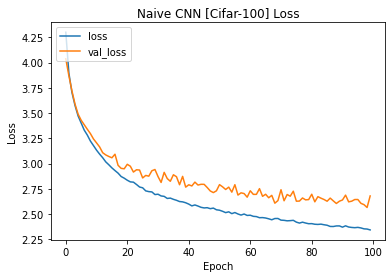

In [12]:
getLossPlot(history, 'Naive CNN [Cifar-100]')

In [13]:
model.save('cifar100_naivecnn_epoch100.h5')

In [3]:
from tensorflow.keras.models import load_model
model = load_model('cifar100_naivecnn_epoch100.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 3ms/step - loss: 2.4702 - accuracy: 0.3701


[2.4701716899871826, 0.3700999915599823]